# KNN

## What is KNN?

**K-Nearest Neighbors (KNN) Algorithm** is a non-parametric, supervised learning classifier. It operates by assessing proximity to make classifications or predictions regarding the categorization of individual data points.

The **K-value** defines how many neighbors will be considered to determine the classification of a specific query point. Selecting the appropriate K value can be a delicate balancing act, as different values can result in overfitting or underfitting. Smaller K values can introduce higher variance but lower bias, while larger K values may result in higher bias and lower variance.

## pseudo code


```
def knn(k,x1,x2,y1,y2)
  k <-- 2                                                       #Se asigna el valor de k
  for punto in dataset:                                         #Se recorre punto por punto haciendo el calculo
    distancia = np.sqrt(np.sum((x1 - x2) ** 2 + (y1 - y2)**2)
  end for
  conteo_clases = Counter(vecino[2] for vecino in vecinos_cercanos) #Se cuentan las etiquetas mas cercanas
  etiqueta_clasificada = conteo_clases.most_common(1)[0][0]   
     #obtenemos la mas popular
  return etiquueta_Clasificada
```



## KNN implementation

To do this example, I will implement a classificator in which determine if the fruit is an apple or is another fruit. using the following parameters

grams and texture of the fruit

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [71]:
# 0 representa 'Manzana'
dataset = np.array([
    [100, 1, 0],
    [120, 1, 0],
    [130, 0, 0],
    [150, 0, 1],
    [170, 0, 1]
])
# Definimos la fruta desconocida que queremos clasificar
fruta_desconocida = np.array([160, 0])  # Peso: 160 gramos, Textura: rugosa

# Especificamos el valor de K
k = 2


In [72]:
# Calculamos las distancias y seleccionamos los K vecinos más cercanos
distancias = []
for punto in dataset:
    distancia = np.sqrt(np.sum((fruta_desconocida[:2] - punto[:2]) ** 2))
    distancias.append((punto, distancia))

distancias.sort(key=lambda x: x[1])
vecinos_cercanos = [p[0] for p in distancias[:k]]

In [73]:
# Contamos las etiquetas de los vecinos cercanos y seleccionamos la etiqueta de mayoría
conteo_clases = Counter(vecino[2] for vecino in vecinos_cercanos)
etiqueta_clasificada = conteo_clases.most_common(1)[0][0]

In [74]:
# Preparamos los datos para la visualización
pesos = dataset[:, 0]
texturas = dataset[0:, 1]
etiquetas = dataset[:, 2]

La fruta desconocida se clasifica como: Otra fruta


Text(0.5, 1.0, 'Conjunto de Datos de Entrenamiento y Clasificación de Fruta Desconocida')

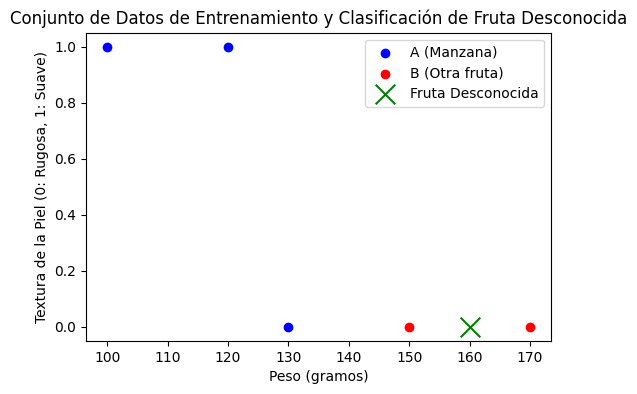

In [77]:
print(f"La fruta desconocida se clasifica como: {'Manzana' if etiqueta_clasificada == 0 else 'Otra fruta'}")
# Visualizamos el conjunto de datos de entrenamiento
plt.figure(figsize=(6, 4))
plt.scatter(pesos[etiquetas == 0], texturas[etiquetas == 0], label='A (Manzana)', color='blue')
plt.scatter(pesos[etiquetas == 1], texturas[etiquetas == 1], label='B (Otra fruta)', color='red')
plt.scatter(fruta_desconocida[0], fruta_desconocida[1], label='Fruta Desconocida', color='green', marker='x', s=200)
plt.xlabel('Peso (gramos)')
plt.ylabel('Textura de la Piel (0: Rugosa, 1: Suave)')
plt.legend()
plt.title('Conjunto de Datos de Entrenamiento y Clasificación de Fruta Desconocida')
#plt.grid(True)

## Loss function
KNN does not use the process of traditional train like anothers algorithms. KNN stores the entire training data set and, when a prediction needs to be made, calculates distances to existing training points to determine the classification of a new point. There is no loss function that is optimized during a training process.